# Youtube Video Statistics 

# YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, to determine the year's top- trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note: that they’re not the most-viewed videos overall for the calendar year. 

# Problem Statement: 
Read the youtube data and perform exploratory data analysis. 

# Dataset Information: 

This dataset is the daily record from the top trending YouTube videos. Top 200 trending videos of a given day. Original Data was collected during 14th November 2017 & 5th March 2018(though, data for January 10th & 11th of 2017 is missing). Original dataset was collected by Youtube API. 


In [131]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

In [132]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [133]:
youtube_views = pd.read_csv("train.csv")

In [134]:
youtube_views

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,OKR48DOE67,20,EA SPORTS FIFA,3150213.0,FIFA 18 - FUT Champions Cup Barcelona - Day 1,fifa|fifa ultimate team|fut|fifa pack opening|...,Day 1 of the FUT Champions Cup Barcelona featu...,7.0,20,5,,FALSE,FALSE,9734,5912,False,747960,NaN,NaN
3194,QJK69DS?91,10,JackWhiteVEVO,261596.0,Jack White - Corporation (Audio),Alternative|Corporation|Jack White|Third Man R...,“Corporation” by Jack White from the forthcomi...,7.0,8,6,,FALSE,FALSE,16006,12019,True,200410,NaN,NaN
3195,VHF51NVr11,10,JamesBlakeVEVO,28321.0,James Blake - If The Car Beside You Moves Ahea...,James|Blake|If|The|Car|Beside|You|Moves|Ahead|...,If the car beside you moves ahead \nAs much as...,11.0,15,4,,FALSE,TRUE,0,0,True,244022,NaN,NaN
3196,XHU22OAJ39,26,Refinery29,890739.0,Lucie Fink Trains Like A Professional Gymnast ...,refinery29|refinery 29|r29|r29 video|refinery2...,"On this episode of Lucie For Hire, our host Lu...",11.0,14,6,250750,TRUE,FALSE,6859,1247,True,907340,NaN,NaN


In [135]:
youtube_views.head(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [136]:
youtube_views.tail(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
3193,OKR48DOE67,20,EA SPORTS FIFA,3150213.0,FIFA 18 - FUT Champions Cup Barcelona - Day 1,fifa|fifa ultimate team|fut|fifa pack opening|...,Day 1 of the FUT Champions Cup Barcelona featu...,7.0,20,5,,FALSE,FALSE,9734,5912,False,747960,NaN,NaN
3194,QJK69DS?91,10,JackWhiteVEVO,261596.0,Jack White - Corporation (Audio),Alternative|Corporation|Jack White|Third Man R...,“Corporation” by Jack White from the forthcomi...,7.0,8,6,,FALSE,FALSE,16006,12019,True,200410,NaN,NaN
3195,VHF51NVr11,10,JamesBlakeVEVO,28321.0,James Blake - If The Car Beside You Moves Ahea...,James|Blake|If|The|Car|Beside|You|Moves|Ahead|...,If the car beside you moves ahead \nAs much as...,11.0,15,4,,FALSE,TRUE,0,0,True,244022,NaN,NaN
3196,XHU22OAJ39,26,Refinery29,890739.0,Lucie Fink Trains Like A Professional Gymnast ...,refinery29|refinery 29|r29|r29 video|refinery2...,"On this episode of Lucie For Hire, our host Lu...",11.0,14,6,250750,TRUE,FALSE,6859,1247,True,907340,NaN,NaN
3197,IFD79NSG47,22,MN khan,0.0,Man drops magnum of Champagne on the floor in ...,NaN,"Man spills magnum of champagne ‘worth £30,000’...",12.0,12,4,32337,TRUE,FALSE,8339,5436,True,465531,NaN,NaN


In [138]:
youtube_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

In [139]:
youtube_views.describe()

,subscriber,Trend_day_count,Unnamed: 17
count,3.175000e+03,3197.000000,1.0
mean,3.823981e+06,7.964342,2544.0
std,2.865771e+07,78.556055,NaN
min,0.000000e+00,0.000000,2544.0
25%,2.428800e+05,4.000000,2544.0
50%,1.241220e+06,7.000000,2544.0
75%,3.812622e+06,10.000000,2544.0
max,1.576229e+09,4444.000000,2544.0


In [141]:
youtube_views.isnull()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3194,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [142]:
youtube_views.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [143]:
youtube_views.drop(['Video_id', 'channel_title', 'title', 'tags','description' , 'Unnamed: 17','Unnamed: 18'], axis = 1, inplace = True)


In [144]:
youtube_views.head(10)

,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,22,9086142.0,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,24,5937292.0,1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,23,4191209.0,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,24,13186408.0,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,24,20563106.0,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374
5,28,4652602.0,10.0,9,1,198248,TRUE,FALSE,8619,3697,True,1580238
6,24,5292034.0,4.0,17,5,,FALSE,FALSE,9951,937,False,1204461
7,28,10474796.0,9.0,14,7,103280,TRUE,FALSE,18010,11026,True,2542878
8,1,2453494.0,8.0,20,1,214583,TRUE,FALSE,12126,7855,True,1090597
9,25,3808198.0,11.0,8,2,223434,TRUE,TRUE,0,0,True,1407313


In [145]:
youtube_views.shape

(3198, 12)

In [146]:
youtube_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_id            3192 non-null   object 
 1   subscriber             3175 non-null   float64
 2   Trend_day_count        3197 non-null   float64
 3   Tag_count              3197 non-null   object 
 4   Trend_tag_count        3197 non-null   object 
 5   comment_count          3198 non-null   object 
 6   comment_disabled       3198 non-null   object 
 7   like dislike disabled  3198 non-null   object 
 8   likes                  3198 non-null   object 
 9   dislike                3198 non-null   object 
 10  tag appered in title   3197 non-null   object 
 11  views                  3198 non-null   object 
dtypes: float64(2), object(10)
memory usage: 299.9+ KB


In [147]:
df_numeric_features = youtube_views.select_dtypes(include=[np.number])

In [148]:
df_numeric_features.head()

,subscriber,Trend_day_count
0,9086142.0,6.0
1,5937292.0,1.0
2,4191209.0,10.0
3,13186408.0,12.0
4,20563106.0,11.0


In [149]:
df_categorical_features = youtube_views.select_dtypes(include=[object])


In [150]:
df_categorical_features.head()

,category_id,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,22,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,24,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,23,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,24,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,24,15,7,268085,TRUE,TRUE,0,0,True,4835374


In [151]:
def imputeTrainNull(data):    
    data.Trend_day_count = pd.to_numeric(data.Trend_day_count, errors='coerce')
    data.Tag_count = pd.to_numeric(data.Tag_count, errors='coerce')
    data.likes = pd.to_numeric(data.likes, errors='coerce')
    data.dislike = pd.to_numeric(data.dislike, errors='coerce')
    data.views = pd.to_numeric(data.views, errors='coerce')
    data.comment_count = pd.to_numeric(data.comment_count, errors='coerce')
    data.Trend_tag_count = pd.to_numeric(data.Trend_tag_count, errors='coerce')
    print(data.isnull().sum())
    
imputeTrainNull(youtube_views)

category_id                 6
subscriber                 23
Trend_day_count             1
Tag_count                   2
Trend_tag_count             3
comment_count            1015
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     1
tag appered in title        1
views                       1
dtype: int64


In [153]:
df_numeric_features =  youtube_views.select_dtypes(include=[np.number])

In [154]:
df_numeric_features.head()

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
0,9086142.0,6.0,21.0,6.0,NaN,13342.0,6089.0,1978978.0
1,5937292.0,1.0,23.0,1.0,116266.0,5761.0,3044.0,1487870.0
2,4191209.0,10.0,22.0,3.0,257850.0,0.0,0.0,1502102.0
3,13186408.0,12.0,17.0,5.0,263939.0,0.0,0.0,3519302.0
4,20563106.0,11.0,15.0,7.0,268085.0,0.0,0.0,4835374.0


In [155]:
df_categorical_features = youtube_views.select_dtypes(include=[object])

In [156]:
df_categorical_features.head()

,category_id,comment_disabled,like dislike disabled,tag appered in title
0,22,FALSE,FALSE,False
1,24,TRUE,FALSE,False
2,23,TRUE,TRUE,True
3,24,TRUE,TRUE,True
4,24,TRUE,TRUE,True


array([[<Axes: title={'center': 'subscriber'}>,
        <Axes: title={'center': 'Trend_day_count'}>,
        <Axes: title={'center': 'Tag_count'}>],
       [<Axes: title={'center': 'Trend_tag_count'}>,
        <Axes: title={'center': 'comment_count'}>,
        <Axes: title={'center': 'likes'}>],
       [<Axes: title={'center': 'dislike'}>,
        <Axes: title={'center': 'views'}>, <Axes: >]], dtype=object)

<Figure size 2000x1200 with 0 Axes>

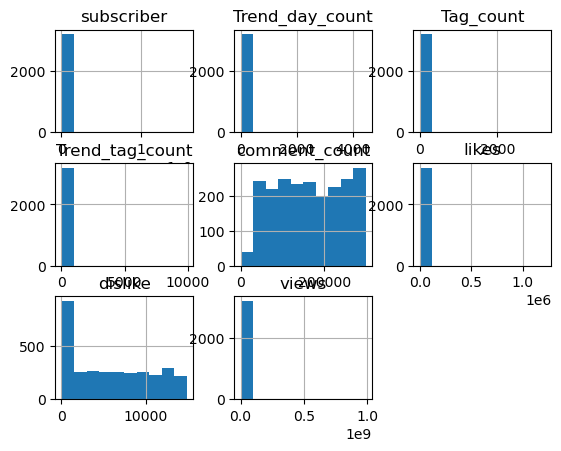

In [157]:
plt.figure(figsize = (20,12))
youtube_views.hist()

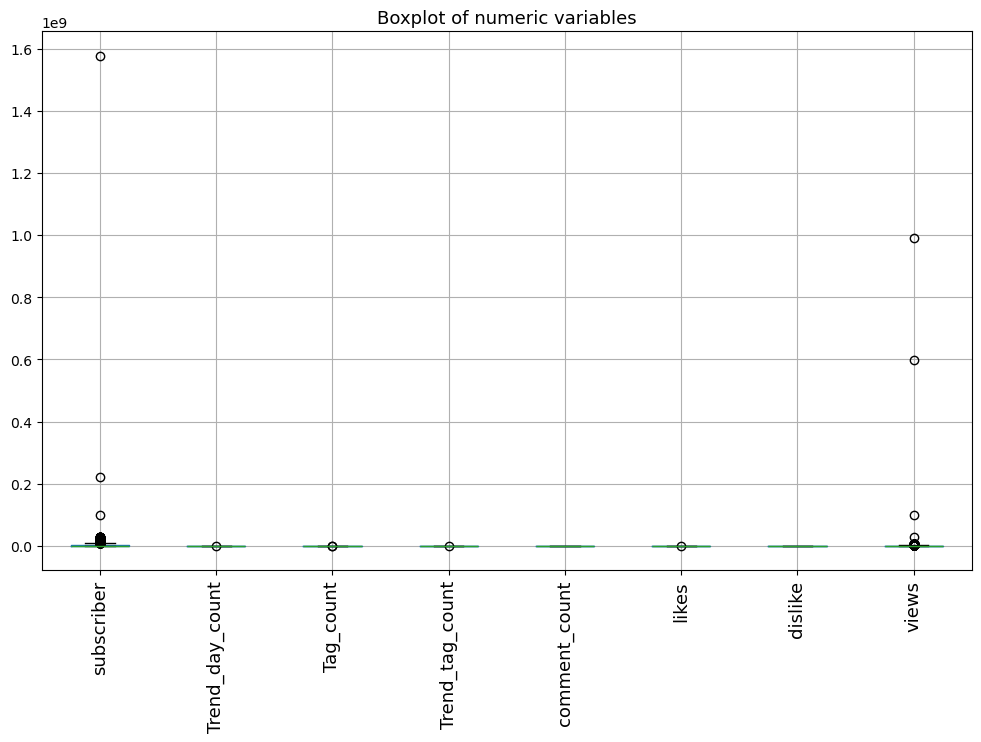

In [158]:
plt.figure(figsize = (12,7))
df_numeric_features.boxplot()
plt.title('Boxplot of numeric variables', fontsize = 13)
plt.xticks(rotation = 'vertical', fontsize = 13)
plt.show()

In [159]:
def imputepreceding_values(data):
    
    data.comment_disabled.fillna(method ='ffill', inplace=True)
    data['like dislike disabled'].fillna(method ='ffill', inplace=True)
    data.category_id.fillna(method ='ffill', inplace=True)
    data['tag appered in title'].fillna(method ='ffill', inplace=True)
    print(data.isnull().sum())
imputepreceding_values(youtube_views)

category_id                 0
subscriber                 23
Trend_day_count             1
Tag_count                   2
Trend_tag_count             3
comment_count            1015
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     1
tag appered in title        0
views                       1
dtype: int64


In [160]:
def impute_median_values(data):
    data['Tag_count'] = pd.to_numeric(data['Tag_count'], errors='coerce')
    data['Trend_day_count'] = pd.to_numeric(data['Trend_day_count'], errors='coerce')
    data['Trend_tag_count'] = pd.to_numeric(data['Trend_tag_count'], errors='coerce')
    data['comment_count'] = pd.to_numeric(data['comment_count'], errors='coerce')
    data['Tag_count'].fillna(data['Tag_count'].median(), inplace=True)
    data['Trend_day_count'].fillna(data['Trend_day_count'].median(), inplace=True)
    data['Trend_tag_count'].fillna(data['Trend_tag_count'].median(), inplace=True)
    data['comment_count'].fillna(data['comment_count'].median(), inplace=True)
    data['subscriber'].fillna(data['subscriber'].median(), inplace=True)
    return data
youtube_views = impute_median_values(youtube_views)
print(youtube_views.isnull().sum())


category_id              0
subscriber               0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    1
dislike                  1
tag appered in title     0
views                    1
dtype: int64


In [161]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from scipy.stats import f_oneway

In [162]:
def handleOutliers(data):
    df_num = data.select_dtypes(include=['int64','float64' ])
    z = np.abs(stats.zscore(df_num))
    x= np.where(z > 3)
    data.drop(data.index[x[:1]], inplace=True)
    print(df_num.skew())
handleOutliers(youtube_views)

subscriber         52.424693
Trend_day_count    56.386890
Tag_count          39.715994
Trend_tag_count    56.539992
comment_count      -0.001841
likes              48.550693
dislike             0.242542
views              42.617464
dtype: float64


In [163]:
youtube_views = youtube_views.reset_index(drop = True)

In [164]:
youtube_views['views'] = pd.to_numeric(youtube_views['views'], errors='coerce')
youtube_views['subscriber'] = pd.to_numeric(youtube_views['subscriber'], errors='coerce')

In [165]:
youtube_views['views'] = youtube_views['views'] ** (1/3)
youtube_views['subscriber'] = youtube_views['subscriber'] ** (1/3)

In [167]:
print(youtube_views[['views', 'subscriber']].isnull().sum())

views         1
subscriber    0
dtype: int64


In [168]:
print(youtube_views[['views', 'subscriber']].skew())

views         8.818109
subscriber    0.429183
dtype: float64


In [169]:
Total = youtube_views.isnull().sum().sort_values(ascending=False) 
Total

likes                    1
dislike                  1
views                    1
category_id              0
subscriber               0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
tag appered in title     0
dtype: int64

In [170]:
Percentage = (youtube_views.isnull().sum()*100/youtube_views.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
likes,1,0.031338
dislike,1,0.031338
views,1,0.031338
category_id,0,0.000000
subscriber,0,0.000000
Trend_day_count,0,0.000000
Tag_count,0,0.000000
Trend_tag_count,0,0.000000
comment_count,0,0.000000
comment_disabled,0,0.000000


In [171]:
youtube_views['tag appered in title'] = youtube_views['tag appered in title'].astype('object')
youtube_views['category_id'] = youtube_views['category_id'].astype('object')

In [172]:
youtube_views['comment_disabled'] = youtube_views['comment_disabled'].astype('str')
youtube_views['like dislike disabled'] = youtube_views['like dislike disabled'].astype('str')

In [173]:
youtube_views.comment_disabled = youtube_views.comment_disabled.str.lower()
youtube_views['like dislike disabled'] = youtube_views['like dislike disabled'].str.lower() 

In [174]:
df_numeric_features = youtube_views.select_dtypes(include=[np.number])
df_numeric_features.head()

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
0,208.669915,6.0,21.0,6.0,163785.0,13342.0,6089.0,125.549115
1,181.076797,1.0,23.0,1.0,116266.0,5761.0,3044.0,114.162025
2,161.230217,10.0,22.0,3.0,257850.0,0.0,0.0,114.524870
3,236.252005,12.0,17.0,5.0,263939.0,0.0,0.0,152.108043
4,273.965728,11.0,15.0,7.0,268085.0,0.0,0.0,169.099902


In [176]:
df_categorial_features = youtube_views.select_dtypes(include=object)
df_categorial_features.head()

,category_id,comment_disabled,like dislike disabled,tag appered in title
0,22,false,false,False
1,24,true,false,False
2,23,true,true,True
3,24,true,true,True
4,24,true,true,True


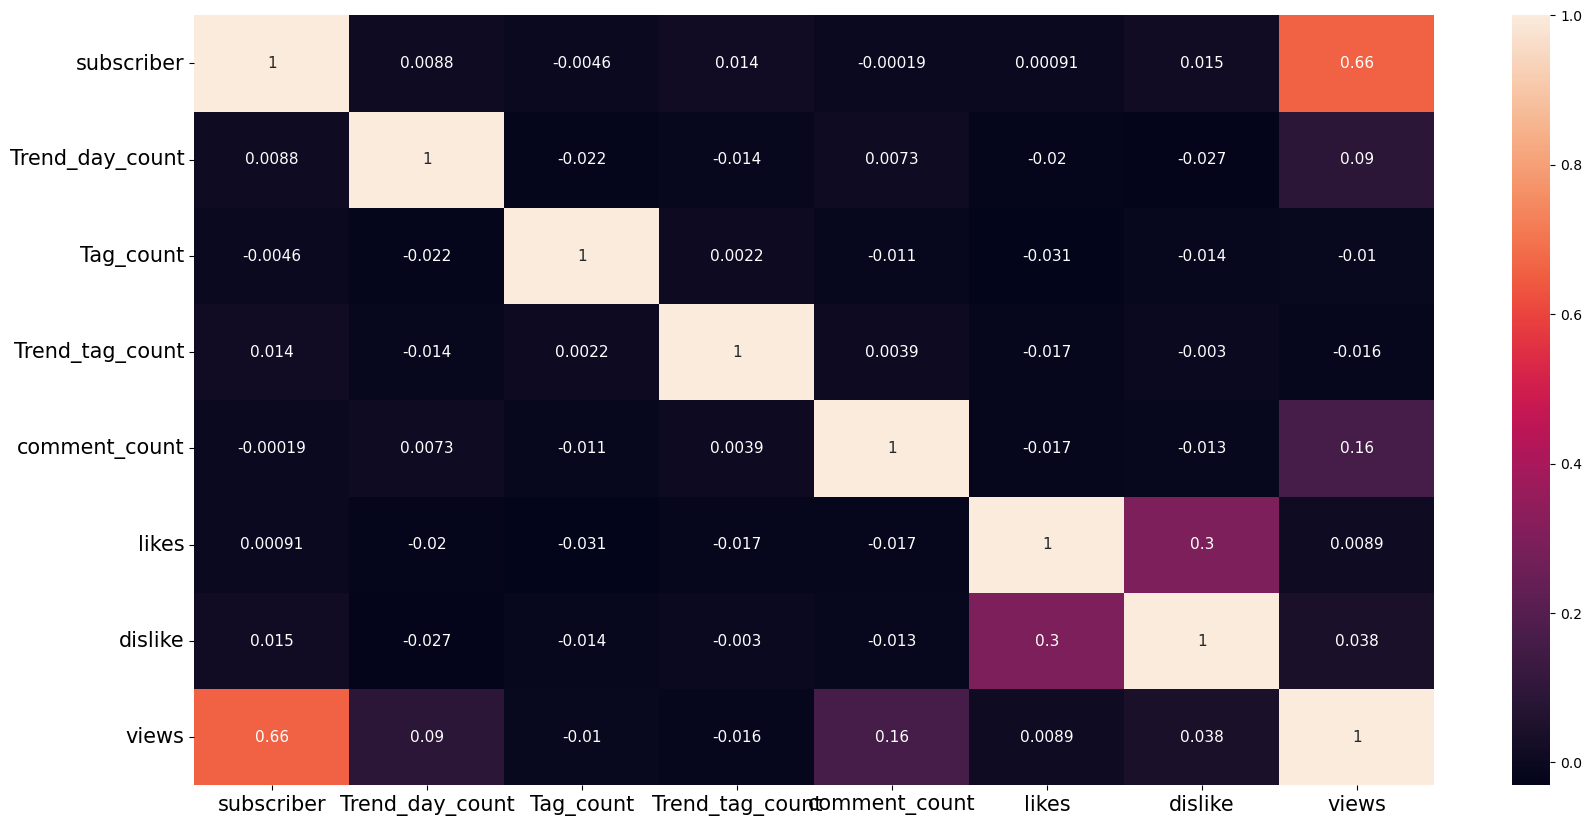

In [177]:
plt.figure(figsize =(20,10))
sns.heatmap(df_numeric_features.corr(), annot = True, annot_kws = {"size": 11})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [185]:
df_numeric_features = df_numeric_features.apply(pd.to_numeric, errors='coerce')
df_numeric_features = df_numeric_features.dropna()
corr_matrix = df_numeric_features.corr()
filtered_corr_matrix = corr_matrix[np.abs(corr_matrix) > 0.6]

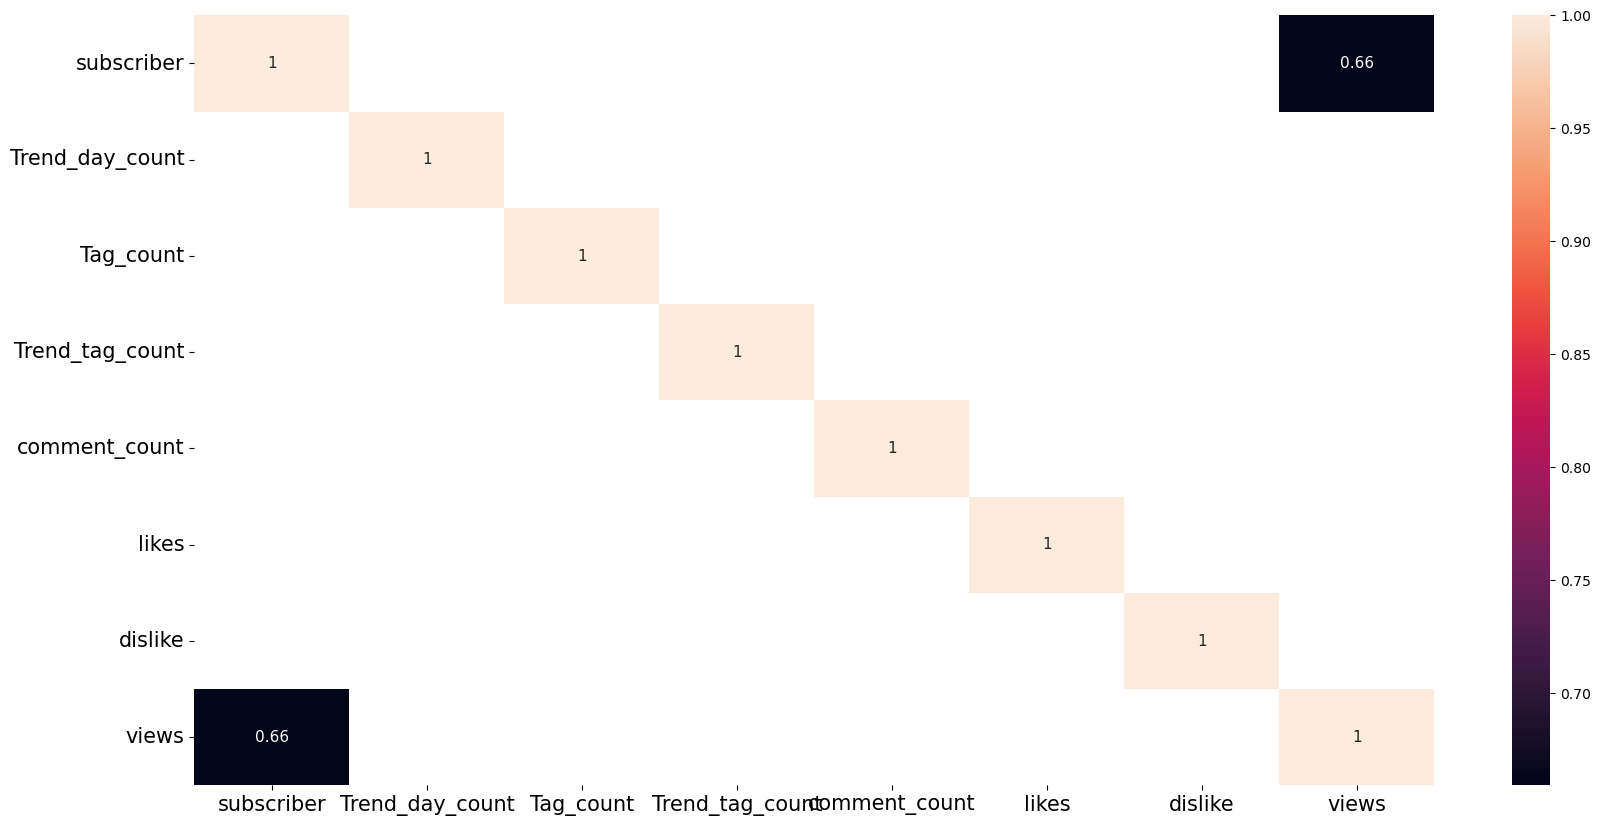

In [187]:
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_corr_matrix,annot=True,annot_kws={"size": 11})
plt.yticks(rotation='horizontal', fontsize=15)
plt.xticks(fontsize=15)
plt.show()